In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from googletrans import Translator
import sklearn
import sys
sys.path.append('..')
import cleaner
import utils
%config IPCompleter.use_jedi = False

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
raw_df = pd.read_csv('Post-2023-11-17.csv')

/tmp/ipykernel_22387/2624474902.py:1: DtypeWarning: Columns (10,11,12,13,16,17,55,56,58,68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv('Post-2023-11-17.csv')


In [5]:
raw_df

,id,is_active,created_at,token,token_code,city_rel,city_name,image_count,title,top_description_text,middle_description_text,bottom_description_text,red_text,checkable,label,label_color,is_checked,has_chat,district_persian,city_persian,category_slug_persian,last_post_date,first_post_date,brand_model,business_ref,business_type,cat_1,cat_2,cat_3,category,city,credit,district,gender,originality,price,rent,status,image_url,web_url,unavailable_after,description,chat_enabled,suggestion_tokens,elevator,not_elevator,parking,not_parking,depot,not_depot,map_type,latitude,longitude,radius,map_image_url,balcony,not_balcony,check_cost_limit,check_cost,pricing_cost,meter,rooms,floor,total_price,price_per_meter,real_state_agency,real_state_agent,year,land_meter,house_status
0,80881,1,2023-11-17 17:22:18,82058,QZBNWVif,NaN,tehran,12.0,۹۰متری دوخوابه _ شهرک مسکونی چیتگر وام دودرصدی...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,چیتگر,تهران,فروش آپارتمان,NaN,NaN,NaN,33555,real-estate-business,real-estate,residential-sell,apartment-sell,apartment-sell,tehran,0.0,chitgar,NaN,NaN,9.900000e+08,0.0,NaN,https://s100.divarcdn.com/static/thumbnails/17...,https://divar.ir/v/QZBNWVif,2023-12-01T23:58:15.869407,۹۰متری دوخوابه _ شهرک مسکونی چیتگر وام دودرصدی...,True,"[""QZLVnMB4"", ""QZ1whJmz"", ""QZSVjNvs"", ""QZ1syUkI...",True,NaN,True,NaN,True,NaN,FUZZY,35.715134,51.18657,500.0,https://api.divar.ir/v8/mapimage?encrypted_dat...,NaN,NaN,NaN,NaN,NaN,۹۰,۲,۸ از ۱۲,۹۹۰٬۰۰۰٬۰۰۰ تومان,۱۱٬۰۰۰٬۰۰۰ تومان,دفتر فروش مرکزی,منصوری,۱۴۰۲,NaN,NaN
1,80880,1,2023-11-17 17:22:18,82057,QZ6gqnCh,NaN,tehran,20.0,شهرک غرب _ عمارت سلطنتی _ ۱۵۸ متر _ فول|فروش آ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,شهرک غرب,تهران,فروش آپارتمان,NaN,NaN,NaN,832,real-estate-business,real-estate,residential-sell,apartment-sell,apartment-sell,tehran,0.0,shahrak-e-gharb,NaN,NaN,4.300000e+10,0.0,NaN,https://s100.divarcdn.com/static/thumbnails/17...,https://divar.ir/v/QZ6gqnCh,2023-11-26T21:28:55.461589,شهرک غرب _ عمارت سلطنتی _ ۱۵۸ متر _ فول|فروش آ...,True,"[""QZ-ohtqu"", ""QZGRxmcQ"", ""QZAZtb-l"", ""QZDR58th...",True,NaN,True,NaN,True,NaN,FUZZY,35.768875,51.36951,500.0,https://api.divar.ir/v8/mapimage?encrypted_dat...,NaN,NaN,NaN,NaN,NaN,۱۵۸,۳,۴ از ۷,۴۳٬۰۰۰٬۰۰۰٬۰۰۰ تومان,۲۷۲٬۱۵۱٬۰۰۰ تومان,گروه مشاورين املاک يوسفيان,علی معصومی,۱۴۰۲,NaN,NaN
2,80879,1,2023-11-17 17:22:18,82056,QZI16P85,NaN,tehran,10.0,۴۰۰ متر ۴ خواب مستر تکواحدی تاپ لوکیشن|فروش آپ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,دروس,تهران,فروش آپارتمان,NaN,NaN,NaN,1015,real-estate-business,real-estate,residential-sell,apartment-sell,apartment-sell,tehran,0.0,darrous,NaN,NaN,1.000000e+11,0.0,NaN,https://s100.divarcdn.com/static/thumbnails/16...,https://divar.ir/v/QZI16P85,2023-12-07T12:40:13.028916,۴۰۰ متر ۴ خواب مستر تکواحدی تاپ لوکیشن|فروش آپ...,True,"[""QZI154hR"", ""QZ28xIPs"", ""QZ4srHGG"", ""QZHpuDPZ...",True,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,۴۰۰,۴,۲,۱۰۰٬۰۰۰٬۰۰۰٬۰۰۰ تومان,۲۵۰٬۰۰۰٬۰۰۰ تومان,املاک ایوان,تیرداد,۱۳۹۵,NaN,NaN
3,80878,1,2023-11-17 17:22:12,82055,QZR9fDg6,NaN,tehran,16.0,اردستانی نگین غرب 92متر|فروش آپارتمان|تهران، چ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,چیتگر,تهران,فروش آپارتمان,NaN,NaN,NaN,agent_21046,real-estate-business,real-estate,residential-sell,apartment-sell,apartment-sell,tehran,0.0,chitgar,NaN,NaN,5.750000e+09,0.0,NaN,https://s100.divarcdn.com/static/thumbnails/16...,https://divar.ir/v/QZR9fDg6,2023-12-14T14:19:08.942587,اردستانی نگین غرب 92متر|فروش آپارتمان|تهران، چ...,True,"[""QZK5io3L"", ""QZLN7GNA"", ""QZJRVufl"", ""QZP5F4Hr...",True,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,۹۲,۲,۷ از ۸,۵٬۷۵۰٬۰۰۰٬۰۰۰ تومان,۶۲٬۵۰۰٬۰۰۰ تومان,NaN,علیرضا دیبا,۱۳۹۵,NaN,NaN
4,80877,1,2023-11-17 17:22:12,82054,QZI5Ytb1,NaN,tehran,12.0,۸۶ متر شهرک دانشگاه شریف سند دار اردستانی خراز...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,شریف,تهران,فروش آپارتمان,NaN,NaN,NaN,agent_423155,real-estate-business,real-estate,residential-sell,apartment-sell,apartment-sell,tehran,0.0,sharif,NaN,NaN,6.880000e+09,0.0,NaN,https:/

In [6]:
# raw_df.real_state_agency[(raw_df.real_state_agency.str.contains('personal'))]
raw_df[raw_df['real_state_agency'].isna() | raw_df['real_state_agency'].str.contains('personal')]

,id,is_active,created_at,token,token_code,city_rel,city_name,image_count,title,top_description_text,middle_description_text,bottom_description_text,red_text,checkable,label,label_color,is_checked,has_chat,district_persian,city_persian,category_slug_persian,last_post_date,first_post_date,brand_model,business_ref,business_type,cat_1,cat_2,cat_3,category,city,credit,district,gender,originality,price,rent,status,image_url,web_url,unavailable_after,description,chat_enabled,suggestion_tokens,elevator,not_elevator,parking,not_parking,depot,not_depot,map_type,latitude,longitude,radius,map_image_url,balcony,not_balcony,check_cost_limit,check_cost,pricing_cost,meter,rooms,floor,total_price,price_per_meter,real_state_agency,real_state_agent,year,land_meter,house_status
3,80878,1,2023-11-17 17:22:12,82055,QZR9fDg6,NaN,tehran,16.0,اردستانی نگین غرب 92متر|فروش آپارتمان|تهران، چ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,چیتگر,تهران,فروش آپارتمان,NaN,NaN,NaN,agent_21046,real-estate-business,real-estate,residential-sell,apartment-sell,apartment-sell,tehran,0.0,chitgar,NaN,NaN,5.750000e+09,0.0,NaN,https://s100.divarcdn.com/static/thumbnails/16...,https://divar.ir/v/QZR9fDg6,2023-12-14T14:19:08.942587,اردستانی نگین غرب 92متر|فروش آپارتمان|تهران، چ...,True,"[""QZK5io3L"", ""QZLN7GNA"", ""QZJRVufl"", ""QZP5F4Hr...",True,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,۹۲,۲,۷ از ۸,۵٬۷۵۰٬۰۰۰٬۰۰۰ تومان,۶۲٬۵۰۰٬۰۰۰ تومان,NaN,علیرضا دیبا,۱۳۹۵,NaN,NaN
4,80877,1,2023-11-17 17:22:12,82054,QZI5Ytb1,NaN,tehran,12.0,۸۶ متر شهرک دانشگاه شریف سند دار اردستانی خراز...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,شریف,تهران,فروش آپارتمان,NaN,NaN,NaN,agent_423155,real-estate-business,real-estate,residential-sell,apartment-sell,apartment-sell,tehran,0.0,sharif,NaN,NaN,6.880000e+09,0.0,NaN,https://s100.divarcdn.com/static/thumbnails/16...,https://divar.ir/v/QZI5Ytb1,2023-12-07T10:29:18.941137,۸۶ متر شهرک دانشگاه شریف سند دار اردستانی خراز...,True,"[""QZLJFHGt"", ""QZPpp6cg"", ""QZPB9op6"", ""QZ_0H9JA...",True,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,https://api.divar.ir/v8/mapimage?encrypted_dat...,NaN,NaN,NaN,NaN,NaN,۸۶,۲,۲ از ۳,۶٬۸۸۰٬۰۰۰٬۰۰۰ تومان,۸۰٬۰۰۰٬۰۰۰ تومان,NaN,سید محمد طباطبایی,۱۳۹۴,NaN,NaN
10,80871,1,2023-11-17 17:22:00,82048,QZS5l4k-,NaN,tehran,0.0,آپارتمان۵۴متری تک خواب پیروزی پرستارشمالی|فروش...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,پیروزی,تهران,فروش آپارتمان,NaN,NaN,NaN,NaN,personal,real-estate,residential-sell,apartment-sell,apartment-sell,tehran,0.0,pirouzi,NaN,NaN,3.750000e+09,0.0,NaN,NaN,https://divar.ir/v/QZS5l4k-,2023-12-14T21:07:39.646090,آپارتمان۵۴متری تک خواب پیروزی پرستارشمالی|فروش...,True,"[""QZ4ccubN"", ""QZDB0uTq"", ""QZQtLmfQ"", ""QZGxSYow...",NaN,True,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,۵۴,۱,۱ از ۴,۳٬۷۵۰٬۰۰۰٬۰۰۰ تومان,۶۹٬۴۴۴٬۰۰۰ تومان,NaN,NaN,۱۳۸۳,NaN,NaN
13,80868,1,2023-11-17 17:21:49,82045,QZ2sxPgd,NaN,tehran,0.0,آپارتمان۵۲ متری|فروش آپارتمان|تهران، تهرانپارس...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,تهرانپارس شرقی,تهران,فروش آپارتمان,NaN,NaN,NaN,agent_354131,real-estate-business,real-estate,residential-sell,apartment-sell,apartment-sell,tehran,0.0,east-tehranpars,NaN,NaN,3.550000e+09,0.0,NaN,NaN,https://divar.ir/v/QZ2sxPgd,2023-11-23T10:35:37.925833,آپارتمان۵۲ متری|فروش آپارتمان|تهران، تهرانپارس...,True,"[""QZJBfggL"", ""QZ409VZ2"", ""QZHtKSgZ"", ""QZDlXsd5...",NaN,True,True,NaN,True,NaN,NaN,NaN,NaN,NaN,https://api.divar.ir/v8/mapimage?encrypted_dat...,NaN,NaN,NaN,NaN,NaN,۵۲,۱,۴,۳٬۵۵۰٬۰۰۰٬۰۰۰ تومان,۶۸٬۲۶۹٬۰۰۰ تومان,NaN,مهرگان اسدی,۱۳۸۹,NaN,NaN
18,80863,1,2023-11-17 17:21:37,82040,QZPxCoi7,NaN,tehran,4.0,اپارتمان 45 متری_جنوبی_کوچه پهن_در مرتضی گرد|ف...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,خانی‌آباد نو,تهران,فروش آپارتمان,NaN,NaN,NaN,agent_456628,real-estate-business,real-estate,residential-sell,apartment-sell,apartment-sell,tehran,0.0,khani-abad-no,NaN,NaN,8.600000e+08,0.0,NaN,https://s100.divarcdn.com/static/thumbnails/17...,https://divar.ir/v/QZPxCoi7,2023-12-12T10:56:43.602511,اپارتمان 45 متری_جنوبی_کوچه پهن_در مرتضی

In [7]:
(raw_df.isna().sum() / raw_df.id.count() > 0.9 )
null_percentage = raw_df.isna().sum() / raw_df.shape[0]
columns_with_more_than_80_percent_null = null_percentage[null_percentage > 0.8].index
columns_with_more_than_90_percent_null = null_percentage[null_percentage > 0.9].index
percent_90_null_columns = [column for column in columns_with_more_than_90_percent_null]
percent_80_null_columns = [column for column in columns_with_more_than_80_percent_null]

len(percent_90_null_columns)

# {"null_90":percent_90_null_columns,'null_80':set(percent_80_null_columns) - set(percent_90_null_columns)}
percent_80_null_columns

['city_rel',
 'top_description_text',
 'middle_description_text',
 'bottom_description_text',
 'red_text',
 'checkable',
 'label',
 'label_color',
 'is_checked',
 'has_chat',
 'last_post_date',
 'first_post_date',
 'brand_model',
 'gender',
 'originality',
 'status',
 'not_parking',
 'not_depot',
 'map_type',
 'latitude',
 'longitude',
 'radius',
 'balcony',
 'not_balcony',
 'check_cost_limit',
 'check_cost',
 'pricing_cost',
 'land_meter',
 'house_status']

In [8]:
df = cleaner.Cleaner(raw_df).transform()

In [9]:
if_near = pd.read_csv('if_near.csv')

In [10]:
if_near['loc_name'].nunique()

339

In [11]:
df['district_persian'] = df.district_persian.str.replace('‌','')
df['district_persian'] = df.district_persian.str.replace(' ','')

In [65]:
# result = df.loc[~df['district_persian'].isin(if_near['loc_name'])]
# result

In [13]:
result.district_persian.nunique()

8

In [14]:
for_visualization = pd.merge(df, if_near[['loc_name','lat','long']], left_on='district_persian', right_on='loc_name', how='right')

In [16]:
df = pd.merge(df, if_near[['loc_name','if_near']], left_on='district_persian', right_on='loc_name', how='right')

In [17]:
df.if_near.value_counts()

if_near
0    64988
1    14486
Name: count, dtype: int64

### EDA

In [18]:
df.describe()

,price,rent,if_near
count,7.946800e+04,79468.0,79474.000000
mean,1.369249e+10,0.0,0.182273
std,2.630443e+10,0.0,0.386072
min,0.000000e+00,0.0,0.000000
25%,3.800000e+09,0.0,0.000000
50%,7.300000e+09,0.0,0.000000
75%,1.450000e+10,0.0,0.000000
max,1.000000e+12,0.0,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79474 entries, 0 to 79473
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   created_at             79468 non-null  object 
 1   token_code             79468 non-null  object 
 2   city_name              79468 non-null  object 
 3   title                  79468 non-null  object 
 4   district_persian       79468 non-null  object 
 5   city_persian           79468 non-null  object 
 6   category_slug_persian  79468 non-null  object 
 7   business_ref           67141 non-null  object 
 8   business_type          79468 non-null  object 
 9   cat_1                  79468 non-null  object 
 10  cat_2                  79468 non-null  object 
 11  cat_3                  79468 non-null  object 
 12  category               79468 non-null  object 
 13  city                   79468 non-null  object 
 14  district               79468 non-null  object 
 15  pr

In [20]:
df.isna().sum().sort_values(ascending=False)

elevator                 17042
real_state_agent         12333
business_ref             12333
parking                  12094
unavailable_after         9335
image_url                 6980
depot                     6712
suggestion_tokens         3308
floor                      687
rooms                      496
year                       496
price_per_meter            105
chat_enabled                49
meter                        7
total_price                  7
real_state_agency            6
description                  6
created_at                   6
web_url                      6
token_code                   6
rent                         6
city_name                    6
title                        6
district_persian             6
city_persian                 6
category_slug_persian        6
business_type                6
cat_1                        6
cat_2                        6
cat_3                        6
category                     6
city                         6
district

In [21]:
df.total_price.unique()

array(['990٬000٬000 تومان', '5٬750٬000٬000 تومان', '975٬000٬000 تومان',
       ..., '11٬930٬000٬000 تومان', '3٬078٬000٬000 تومان',
       '3٬717٬000٬000 تومان'], dtype=object)

In [22]:
df['floor']

0          [8, 12]
1           [7, 8]
2         [18, 22]
3         [10, 12]
4          [9, 22]
           ...    
79469       [4, 4]
79470    (2, None)
79471       [2, 5]
79472    (1, None)
79473       [1, 4]
Name: floor, Length: 79474, dtype: object

In [23]:
df.meter.unique()

array(['90', '92', '150', '120', '75', '62', '126', '50', '135', '252',
       '110', '174', '71', '106', '125', '100', '118', '55', '85', '105',
       '102', '95', '78', '188', '130', '145', '88', '151', '61', '127',
       '117', '60', '87', '103', '76', '178', '365', '80', '93', '109',
       '124', '119', '155', '52', '142', '270', '107', '325', '115', '65',
       '180', '83', '122', '66', '170', '20', '184', '101', '45', '69',
       '310 متر', '160', '123', '116', '138', '131', '140', '112', '129',
       '114', '70', '84', '196', '10', '104', '148', '47', '108', '77',
       '253', '97', '58', '121', '111', '64', '113', '68', '137', '57',
       '91', '48', '146', '250', '185', '200', '56', '300', '51', '132',
       '172', '141', '162', '144', '63', '133', '152', '73', '96', '128',
       '210', '139', '98', '134', '190', '72', '157', '202', '86', '89',
       '81', '82', '79', '67', '30', '136', '240', '99', '94', '235',
       '158', '303', '53', '173', '302', '74', '181', 

In [24]:
df.year.unique()

array(['1402', '1395', '1400', '1396', '1401', '1398', '1399', '1384',
       '1393', '1371', None, '1397', '1392', '1390', '1394', '1391',
       '1380', '1388', '1385', 'قبل از 1370', '1389', '1387', '1382',
       '1372', '1375', '1383', '1381', '1377', '1373', '1376', '1386',
       '1378', '1379', '1374', nan], dtype=object)

In [25]:
df.rooms.unique()

array(['2', '3', '1', '4', 'بدون اتاق', None, '+4', nan], dtype=object)

In [26]:
df[['total_price','price_per_meter','price']] = df[['total_price','price_per_meter','price']].applymap(lambda x: str(x).replace('تومان',''))
df['total_price'] = df['total_price'].str.replace('\D', '', regex=True)
df['price'] = df['price'].str.replace('\D', '', regex=True)
df['price_per_meter'] = df['price_per_meter'].str.replace('\D', '', regex=True)
df['meter'] = df['meter'].str.replace('متر','').str.replace('\D', '', regex=True)
df['rooms'] = df['rooms'].str.replace('4+','5').str.replace('بدون اتاق','0')

/tmp/ipykernel_22387/965608392.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['total_price','price_per_meter','price']] = df[['total_price','price_per_meter','price']].applymap(lambda x: str(x).replace('تومان',''))


In [27]:
df['total_price'] = pd.to_numeric(df['total_price'])
df['price'] = pd.to_numeric(df['price'])
df['price_per_meter'] = pd.to_numeric(df['price_per_meter'])
df['rooms'] = pd.to_numeric(df['rooms'])
df['meter'] = pd.to_numeric(df['meter'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79474 entries, 0 to 79473
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   created_at             79468 non-null  object 
 1   token_code             79468 non-null  object 
 2   city_name              79468 non-null  object 
 3   title                  79468 non-null  object 
 4   district_persian       79468 non-null  object 
 5   city_persian           79468 non-null  object 
 6   category_slug_persian  79468 non-null  object 
 7   business_ref           67141 non-null  object 
 8   business_type          79468 non-null  object 
 9   cat_1                  79468 non-null  object 
 10  cat_2                  79468 non-null  object 
 11  cat_3                  79468 non-null  object 
 12  category               79468 non-null  object 
 13  city                   79468 non-null  object 
 14  district               79468 non-null  object 
 15  pr

In [29]:
df['year'] = df['year'].str.replace('قبل از 1370','1000')

In [30]:
df['year'] = pd.to_numeric(df['year'])

In [31]:
df['floor'].tail(20)

79454    (2, None)
79455       [4, 6]
79456       [2, 5]
79457    (3, None)
79458       [2, 5]
79459       [4, 5]
79460       [1, 5]
79461       [3, 5]
79462       [1, 4]
79463    (3, None)
79464    (2, None)
79465       [3, 5]
79466    (1, None)
79467       [1, 5]
79468       [0, 4]
79469       [4, 4]
79470    (2, None)
79471       [2, 5]
79472    (1, None)
79473       [1, 4]
Name: floor, dtype: object

In [32]:
df.cat_1.unique()

array(['real-estate', nan], dtype=object)

In [33]:
df.cat_2.unique()

array(['residential-sell', 'real-estate-services', nan], dtype=object)

In [34]:
df.cat_3.unique()

array(['apartment-sell', 'plot-old', 'house-villa-sell', 'presell', nan],
      dtype=object)

In [35]:
df.loc[:,['cat_1','cat_2','cat_3']].tail(30)

,cat_1,cat_2,cat_3
79444,real-estate,residential-sell,apartment-sell
79445,real-estate,residential-sell,apartment-sell
79446,real-estate,residential-sell,apartment-sell
79447,real-estate,residential-sell,apartment-sell
79448,real-estate,residential-sell,apartment-sell
79449,real-estate,residential-sell,apartment-sell
79450,real-estate,residential-sell,apartment-sell
79451,real-estate,residential-sell,apartment-sell
79452,real-estate,residential-sell,apartment-sell
79453,real-estate,residential-sell,apartment-sell


<Axes: >

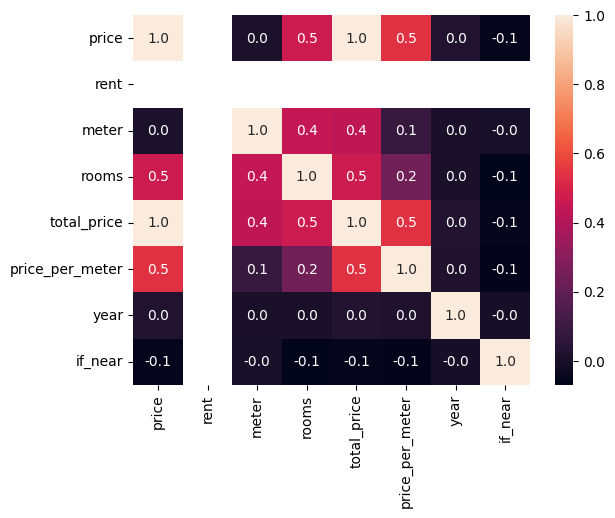

In [36]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".1f")

In [37]:
df.columns

Index(['created_at', 'token_code', 'city_name', 'title', 'district_persian',
       'city_persian', 'category_slug_persian', 'business_ref',
       'business_type', 'cat_1', 'cat_2', 'cat_3', 'category', 'city',
       'district', 'price', 'rent', 'image_url', 'web_url',
       'unavailable_after', 'description', 'chat_enabled', 'suggestion_tokens',
       'elevator', 'parking', 'depot', 'meter', 'rooms', 'floor',
       'total_price', 'price_per_meter', 'real_state_agency',
       'real_state_agent', 'year', 'loc_name', 'if_near'],
      dtype='object')

## visualization

In [38]:
for_visualization

,created_at,token_code,city_name,title,district_persian,city_persian,category_slug_persian,business_ref,business_type,cat_1,cat_2,cat_3,category,city,district,price,rent,image_url,web_url,unavailable_after,description,chat_enabled,suggestion_tokens,elevator,parking,depot,meter,rooms,floor,total_price,price_per_meter,real_state_agency,real_state_agent,year,loc_name,lat,long
0,2023-11-17 17:22:18,QZBNWVif,tehran,۹۰متری دوخوابه _ شهرک مسکونی چیتگر وام دودرصدی...,چیتگر,تهران,فروش آپارتمان,33555,real-estate-business,real-estate,residential-sell,apartment-sell,apartment-sell,tehran,chitgar,9.900000e+08,0.0,https://s100.divarcdn.com/static/thumbnails/17...,https://divar.ir/v/QZBNWVif,2023-12-01T23:58:15.869407,۹۰متری دوخوابه _ شهرک مسکونی چیتگر وام دودرصدی...,True,"[""QZLVnMB4"", ""QZ1whJmz"", ""QZSVjNvs"", ""QZ1syUkI...",True,True,True,90,2,"[8, 12]",990٬000٬000 تومان,11٬000٬000 تومان,دفتر فروش مرکزی,منصوری,1402,چیتگر,35.716956,51.243865
1,2023-11-17 17:22:12,QZR9fDg6,tehran,اردستانی نگین غرب 92متر|فروش آپارتمان|تهران، چ...,چیتگر,تهران,فروش آپارتمان,agent_21046,real-estate-business,real-estate,residential-sell,apartment-sell,apartment-sell,tehran,chitgar,5.750000e+09,0.0,https://s100.divarcdn.com/static/thumbnails/16...,https://divar.ir/v/QZR9fDg6,2023-12-14T14:19:08.942587,اردستانی نگین غرب 92متر|فروش آپارتمان|تهران، چ...,True,"[""QZK5io3L"", ""QZLN7GNA"", ""QZJRVufl"", ""QZP5F4Hr...",True,True,True,92,2,"[7, 8]",5٬750٬000٬000 تومان,62٬500٬000 تومان,personal,علیرضا دیبا,1395,چیتگر,35.716956,51.243865
2,2023-11-17 17:19:24,QZIN635V,tehran,۱۵۰متر۳خ_دریاچه چیتگر_سندی_تهاتر_کدرهگیری|فروش...,چیتگر,تهران,فروش آپارتمان,agent_479126,real-estate-business,real-estate,residential-sell,apartment-sell,apartment-sell,tehran,chitgar,9.750000e+08,0.0,https://s100.divarcdn.com/static/thumbnails/16...,https://divar.ir/v/QZIN635V,2023-12-07T12:01:17.795744,۱۵۰متر۳خ_دریاچه چیتگر_سندی_تهاتر_کدرهگیری|فروش...,True,"[""QZLVnMB4"", ""QZKVTzsA"", ""QZPJoDAb"", ""QZI5d-hD...",True,True,True,150,3,"[18, 22]",975٬000٬000 تومان,6٬500٬000 تومان,personal,کارشناس فروش آکار,1402,چیتگر,35.716956,51.243865
3,2023-11-17 17:18:38,QZT92l0p,tehran,واحد ۱۲۰ متر _ قدرالسهم _ وام _ تهاتر دریاچه چ...,چیتگر,تهران,فروش آپارتمان,agent_466694,real-estate-business,real-estate,residential-sell,apartment-sell,apartment-sell,tehran,chitgar,1.800000e+09,0.0,https://s100.divarcdn.com/static/thumbnails/16...,https://divar.ir/v/QZT92l0p,2023-12-15T16:32:10.015426,واحد ۱۲۰ متر _ قدرالسهم _ وام _ تهاتر دریاچه چ...,True,"[""QZGhoHfW"", ""QZHgPRNE"", ""QZ_0esMC"", ""QZLt0bbB...",True,True,True,120,2,"[10, 12]",1٬800٬000٬000 تومان,15٬000٬000 تومان,personal,کارشناس رسمی تعاونی، خانم شکیبا,1402,چیتگر,35.716956,51.243865
4,2023-11-17 17:07:29,QZMx4MdM,tehran,دریاچه چیتگر_۷۵متر_تهاتر_وام بدون ضامن_|فروش آ...,چیتگر,تهران,فروش آپارتمان,agent_477493,real-estate-business,real-estate,residential-sell,apartment-sell,apartment-sell,tehran,chitgar,2.200000e+09,0.0,https://s100.divarcdn.com/static/thumbnails/17...,https://divar.ir/v/QZMx4MdM,2023-12-10T11:34:53.576888,دریاچه چیتگر_۷۵متر_تهاتر_وام بدون ضامن_|فروش آ...,True,"[""QZJRuSNm"", ""QZAZ8SUd"", ""QZLlkE_m"", ""QZF5S1k4...",True,True,True,75,2,"[9, 22]",2٬200٬000٬000 تومان,29٬333٬000 تومان,personal,کارشناس رسمی تعاونی طهرانی,1402,چیتگر,35.716956,51.243865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79469,2023-11-12 18:16:18,QZKxBoLk,tehran,آپارتمان ۶۸ متری ، فول بازسازی|فروش آپارتمان|ت...,ابوذر(منطقه۱۵),تهران,فروش آپارتمان,NaN,personal,real-estate,residential-sell,apartment-sell,apartment-sell,tehran,abouzar,4.050000e+09,0.0,https://s100.divarcdn.com/static/thumbnails/16...,https://divar.ir/v/QZKxBoLk,2023-12-08T14:47:58.007412,آپارتمان ۶۸ متری ، فول بازسازی|فروش آپارتمان|ت...,True,"[""QZKx325d"", ""QZJhy776"", ""QZGtC4bM"", ""QZHNlpto...",True,NaN,True,68,2,"[4, 4]",4٬050٬000٬000 تومان,59٬558٬000 تومان,personal,NaN,1383,ابوذر(منطقه۱۵),35.730

In [46]:
for_visualization[["total_price","price_per_meter"]]= for_visualization[["total_price","price_per_meter"]].applymap(lambda x: str(x).replace('تومان',''))
for_visualization["price_per_meter"] = for_visualization["price_per_meter"].str.replace('\D', '', regex=True)
for_visualization["price_per_meter"] = pd.to_numeric(for_visualization["price_per_meter"])

/tmp/ipykernel_22387/3198213554.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for_visualization[["total_price","price_per_meter"]]= for_visualization[["total_price","price_per_meter"]].applymap(lambda x: str(x).replace('تومان',''))


In [47]:
x = for_visualization.drop(["total_price","price_per_meter"], inplace=False, axis=1)
y = for_visualization["price_per_meter"]

In [62]:
from sklearn.model_selection import train_test_split
x_train, _test, y_train, y_test =  train_test_split(x, y, test_size=0.2, random_state=42)

new_x = x_train.copy()

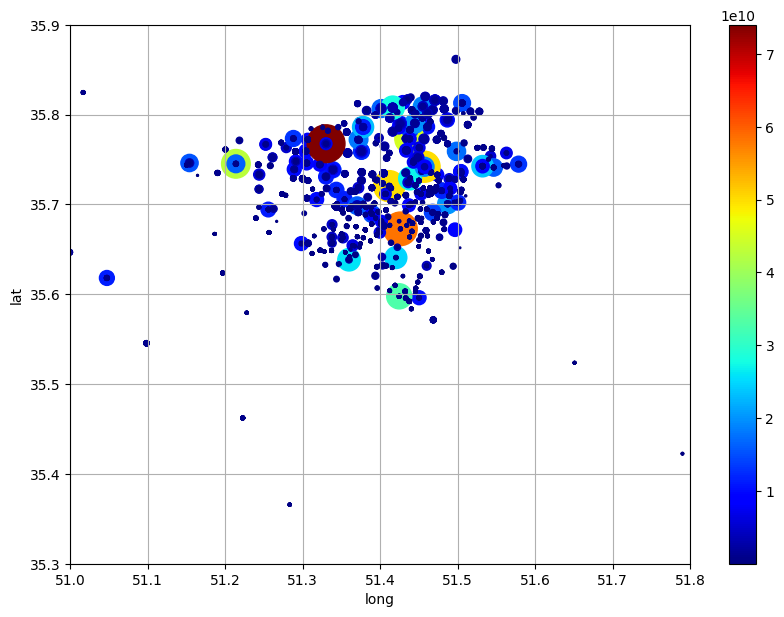

In [64]:
new_x.plot(kind="scatter", x="long", y="lat", grid=True,
             s=y_train/10e7, c=y_train, 
             cmap="jet", colorbar=True, 
             legend=True, sharex=False, figsize=(10, 7))
plt.xlim(51,51.8)
plt.ylim(35.3,35.9)
# plt.xlim(50,53)
# plt.ylim(33,38)
plt.show()